In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn import metrics 
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import OrdinalEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import roc_curve, auc
from sklearn.datasets import make_hastie_10_2
from sklearn.ensemble import GradientBoostingClassifier

In [2]:
df = pd.read_csv('df.csv')
df.head(5)

,Unnamed: 0,age,marital,education,default,balance,housing,loan,day,campaign,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,0,58,1.0,3.0,0,2143,1,0,5,1,...,0,0,1,0,0,0,0,0,0,1
1,1,44,0.0,2.0,0,29,1,0,5,1,...,0,0,1,0,0,0,0,0,0,1
2,2,33,1.0,2.0,0,2,1,1,5,1,...,0,0,1,0,0,0,0,0,0,1
3,3,47,1.0,0.0,0,1506,1,0,5,1,...,0,0,1,0,0,0,0,0,0,1
4,4,33,0.0,0.0,0,1,0,0,5,1,...,0,0,1,0,0,0,0,0,0,1


In [7]:
X = df.drop('y', axis=1)
y = df['y']

y = pd.DataFrame(y).reset_index(drop=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
scaler = preprocessing.StandardScaler().fit(X_train)
X_train_transformed = scaler.transform(X_train)
X_test_transformed = scaler.transform(X_test)

In [9]:
X_train_transformed = pd.DataFrame(X_train_transformed).reset_index(drop=True)
X_test_transformed = pd.DataFrame(X_test_transformed).reset_index(drop=True)
y_train2 = y_train.reset_index(drop=True)
y_test2 = y_test.reset_index(drop=True)
train = pd.concat([X_train, y_train], axis=1)
test = pd.concat([X_test, y_test2], axis=1)

In [14]:
gbc=GradientBoostingClassifier(n_estimators=500, learning_rate=0.1, random_state=42, max_features=5, max_depth=4 )

gbc.fit(X_train_transformed, y_train)

C:\Users\User\anaconda3\Lib\site-packages\sklearn\ensemble\_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingClassifier(max_depth=4, max_features=5, n_estimators=500,
                           random_state=42)

In [20]:
cm = confusion_matrix(y_test, gbc.predict(X_test_transformed))
cm

array([[7785,  167],
       [ 773,  318]], dtype=int64)

In [16]:
print("GBC recall is %2.2f" % recall_score(
    y_test, gbc.predict(X_test_transformed)))

GBC recall is 0.29


In [19]:
accuracy = accuracy_score(
    y_test, gbc.predict(X_test_transformed))
recall = recall_score(
    y_test, gbc.predict(X_test_transformed))
precision = precision_score(
    y_test, gbc.predict(X_test_transformed))
col=['Accuracy', 'Recall', 'Precision']
metric_df = pd.DataFrame(col,[accuracy, recall, precision]).reset_index()

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')

Accuracy: 0.8960521950680084
Precision: 0.6556701030927835
Recall: 0.2914757103574702


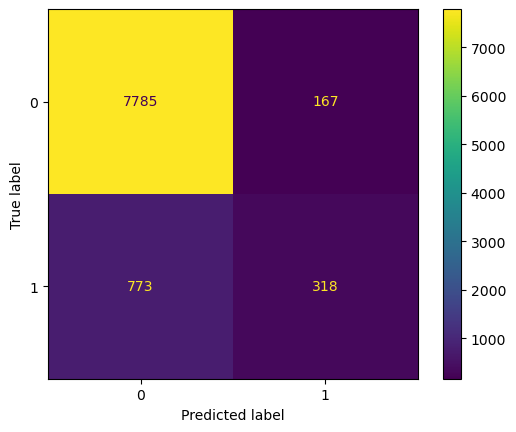

In [21]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=('0','1')
                             )

disp.plot();

C:\Users\User\anaconda3\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but GradientBoostingClassifier was fitted without feature names
  warnings.warn(


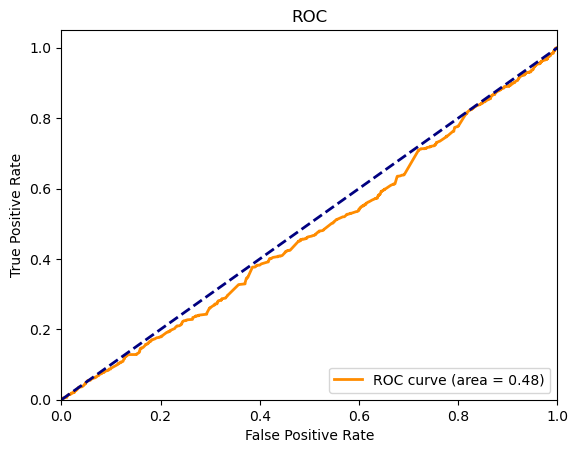

In [22]:
y_scores = gbc.predict_proba(X_test)[:, 1]  

fpr, tpr, _ = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")
plt.show()